# Script Contents
### .01 Importing Libraries and Data
### .02 Select Variables for Exploratory Visual Analysis
### .03 Correlation Heatmap
### .04 Scatterplot
### .05 Pairplot
### .06 Categorical Plot
### .07 Discuss Research Questions
### .08 Formulate Potential Hypotheses

## .01 Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Checking matplotlib version
matplotlib.__version__

'3.8.4'

In [6]:
# Define path
path = r"C:\Users\jacks\Portugese Real Estate Analysis"

In [7]:
# Import the data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'portugal_housing_cleaned.pkl'))

## .02 Variables for Exploratory Visual Analysis

In [9]:
# Reminder of data contents
df.head()

,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,1,True,1992,114,2,1,0,114,2
1,9500,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0,False,1990,27,3,2,0,27,1
2,580000,Faro,Vila do Bispo,Budens,Apartment,D,1,True,2003,84,2,1,0,84,2
3,350000,Faro,Portimão,Portimão,Apartment,C,0,False,1985,68,2,1,0,68,1
4,175000,Faro,Faro,Faro (Sé e São Pedro),House,NC,0,False,1950,78,4,2,0,78,2


In [10]:
# Creating a new df that does not include string or bool datatypes
df_int = df.drop(columns = ['District', 'City', 'Town', 'Type','EnergyCertificate', 'HasParking'])

In [11]:
# CHecking the new df 
df_int.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,1,1992,114,2,1,0,114,2
1,9500,0,1990,27,3,2,0,27,1
2,580000,1,2003,84,2,1,0,84,2
3,350000,0,1985,68,2,1,0,68,1
4,175000,0,1950,78,4,2,0,78,2


## .03 Create a correlation matrix heatmap (colored)

In [13]:
# First, create a correlation matrix
df_int.corr()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
Price,1.000000,0.192933,0.166416,0.019418,0.321928,0.337729,0.154261,0.068754,0.365478
Parking,0.192933,1.000000,0.254446,-0.003055,0.149736,0.174678,0.077518,-0.025033,0.366239
ConstructionYear,0.166416,0.254446,1.000000,-0.001920,-0.029067,0.066104,0.116342,-0.027273,0.287427
TotalArea,0.019418,-0.003055,-0.001920,1.000000,0.010779,-0.010664,-0.002069,0.056649,-0.005276
TotalRooms,0.321928,0.149736,-0.029067,0.010779,1.000000,0.854003,0.347770,-0.022608,0.627281
NumberOfBedrooms,0.337729,0.174678,0.066104,-0.010664,0.854003,1.000000,0.372203,-0.040991,0.637771
NumberOfWC,0.154261,0.077518,0.116342,-0.002069,0.347770,0.372203,1.000000,-0.008736,0.511889
LivingArea,0.068754,-0.025033,-0.027273,0.056649,-0.022608,-0.040991,-0.008736,1.000000,-0.039648
NumberOfBathrooms,0.365478,0.366239,0.287427,-0.005276,0.627281,0.637771,0.511889,-0.039648,1.000000


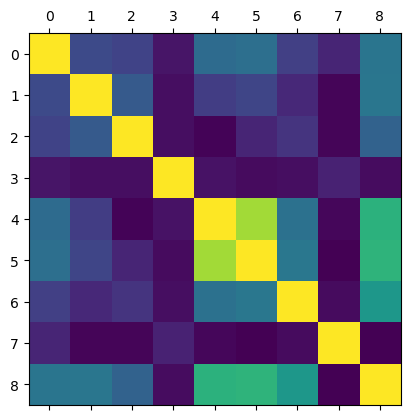

In [14]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_int.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

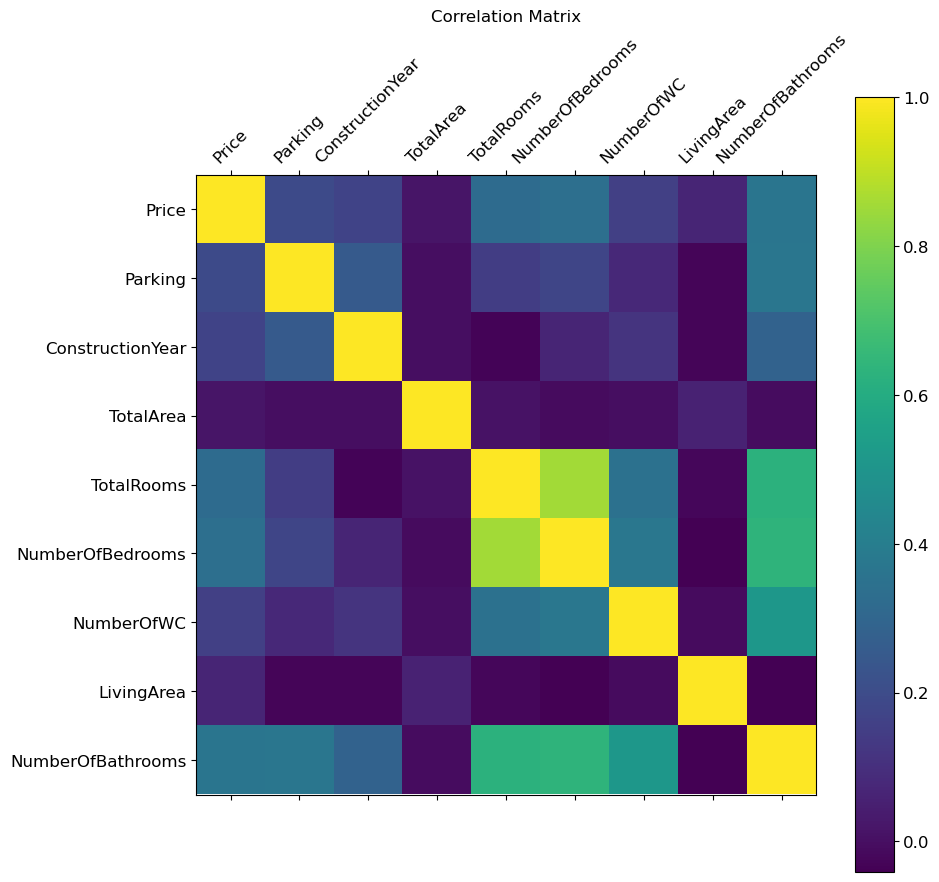

In [15]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(df_int.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_int.shape[1]), df_int.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df_int.shape[1]), df_int.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

Text(0.5, 1.0, 'Correlation Heatmap')

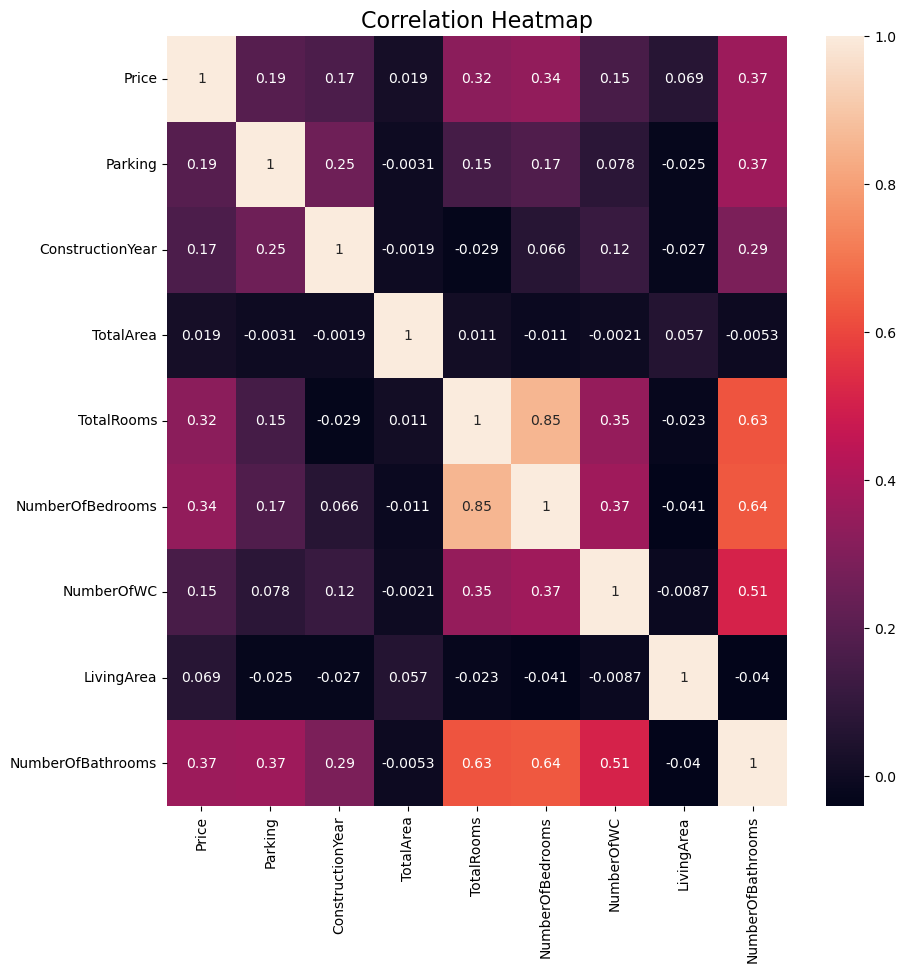

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_heat = sns.heatmap(df_int.corr(), annot = True, ax = ax) 

# Add a title to the plot
ax.set_title("Correlation Heatmap", fontsize=16)

In [46]:
#export heatmap
corr_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_heatmap.png'), bbox_inches='tight')

### Correlation Heatmap Discussion
> **Discuss what the coefficients in the plot mean in terms of the relationships between the variables**

> The closer the coefficients are to 1, the stronger the coefficients' two respective variables are correlated. There are very few variables with strong correlations. Number of bedrooms and total rooms are strongly correlated, which makes sense because there are likely more bedrooms in a property with more total rooms. This isn't a relationship I was planning on exploring. There is also noticeable correlation between number of bathrooms and total rooms as well as number of bedrooms and number of bathrooms. Again, I am not that interested in exploring these relation ships

> What catches my attention is the lack of correlation between many of the vairables. There is some weak positive correlation between price, parking, consturction year, total area and all other variables but there are also instances of near 0 correlation or very slightly negative correlations. I want to investigate why variables such as price, contruction year, and total area aren't strongly correlated with any other quantitative variables.  

## .04 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

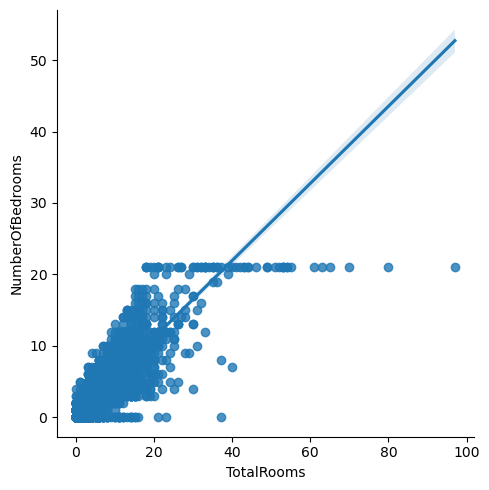

In [52]:
# Create a scatterplot for the "TotalRooms" and "NumberOfBedrooms" columns in seaborn

scatter = sns.lmplot(x = 'TotalRooms', y = 'NumberOfBedrooms', data = df)

In [55]:
#export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'totalrooms_bedrooms_scatter.png'), bbox_inches='tight')

### Scatterplot Discussion
> Most of the points are clustered around the positive trend line. There are several instances of higher total rooms with lower counts, in some cases zero counts, of bedrooms. This could be caused by commericial properties that have zero bedrooms or housing that might have many rooms, such as living, dining, exercise, office, and laundry rooms but less total bedrooms.

> There are also quite a few instances of ~20 bedrooms with a varying number of total rooms. This likely is caused by imputed values. The imputation tool was instructed to impute a max total of 21 rooms for any missing value. This value was chosen based on the original data where the total number of bedrooms for any property was 21. Similarly, the max value for imputed total rooms is 97, which is a value taken from the original data. The use of iterative linear regression appears to have resulted in a wide range of total rooms where the number of bedrooms is at a max of 21.   

## .05 Create a pair plot of the entire data set

In [39]:
# Taking a sample of my data. My device does not have enough memory to pair plot the entire dataset
sample_df = df.sample(n=10000, random_state=42)

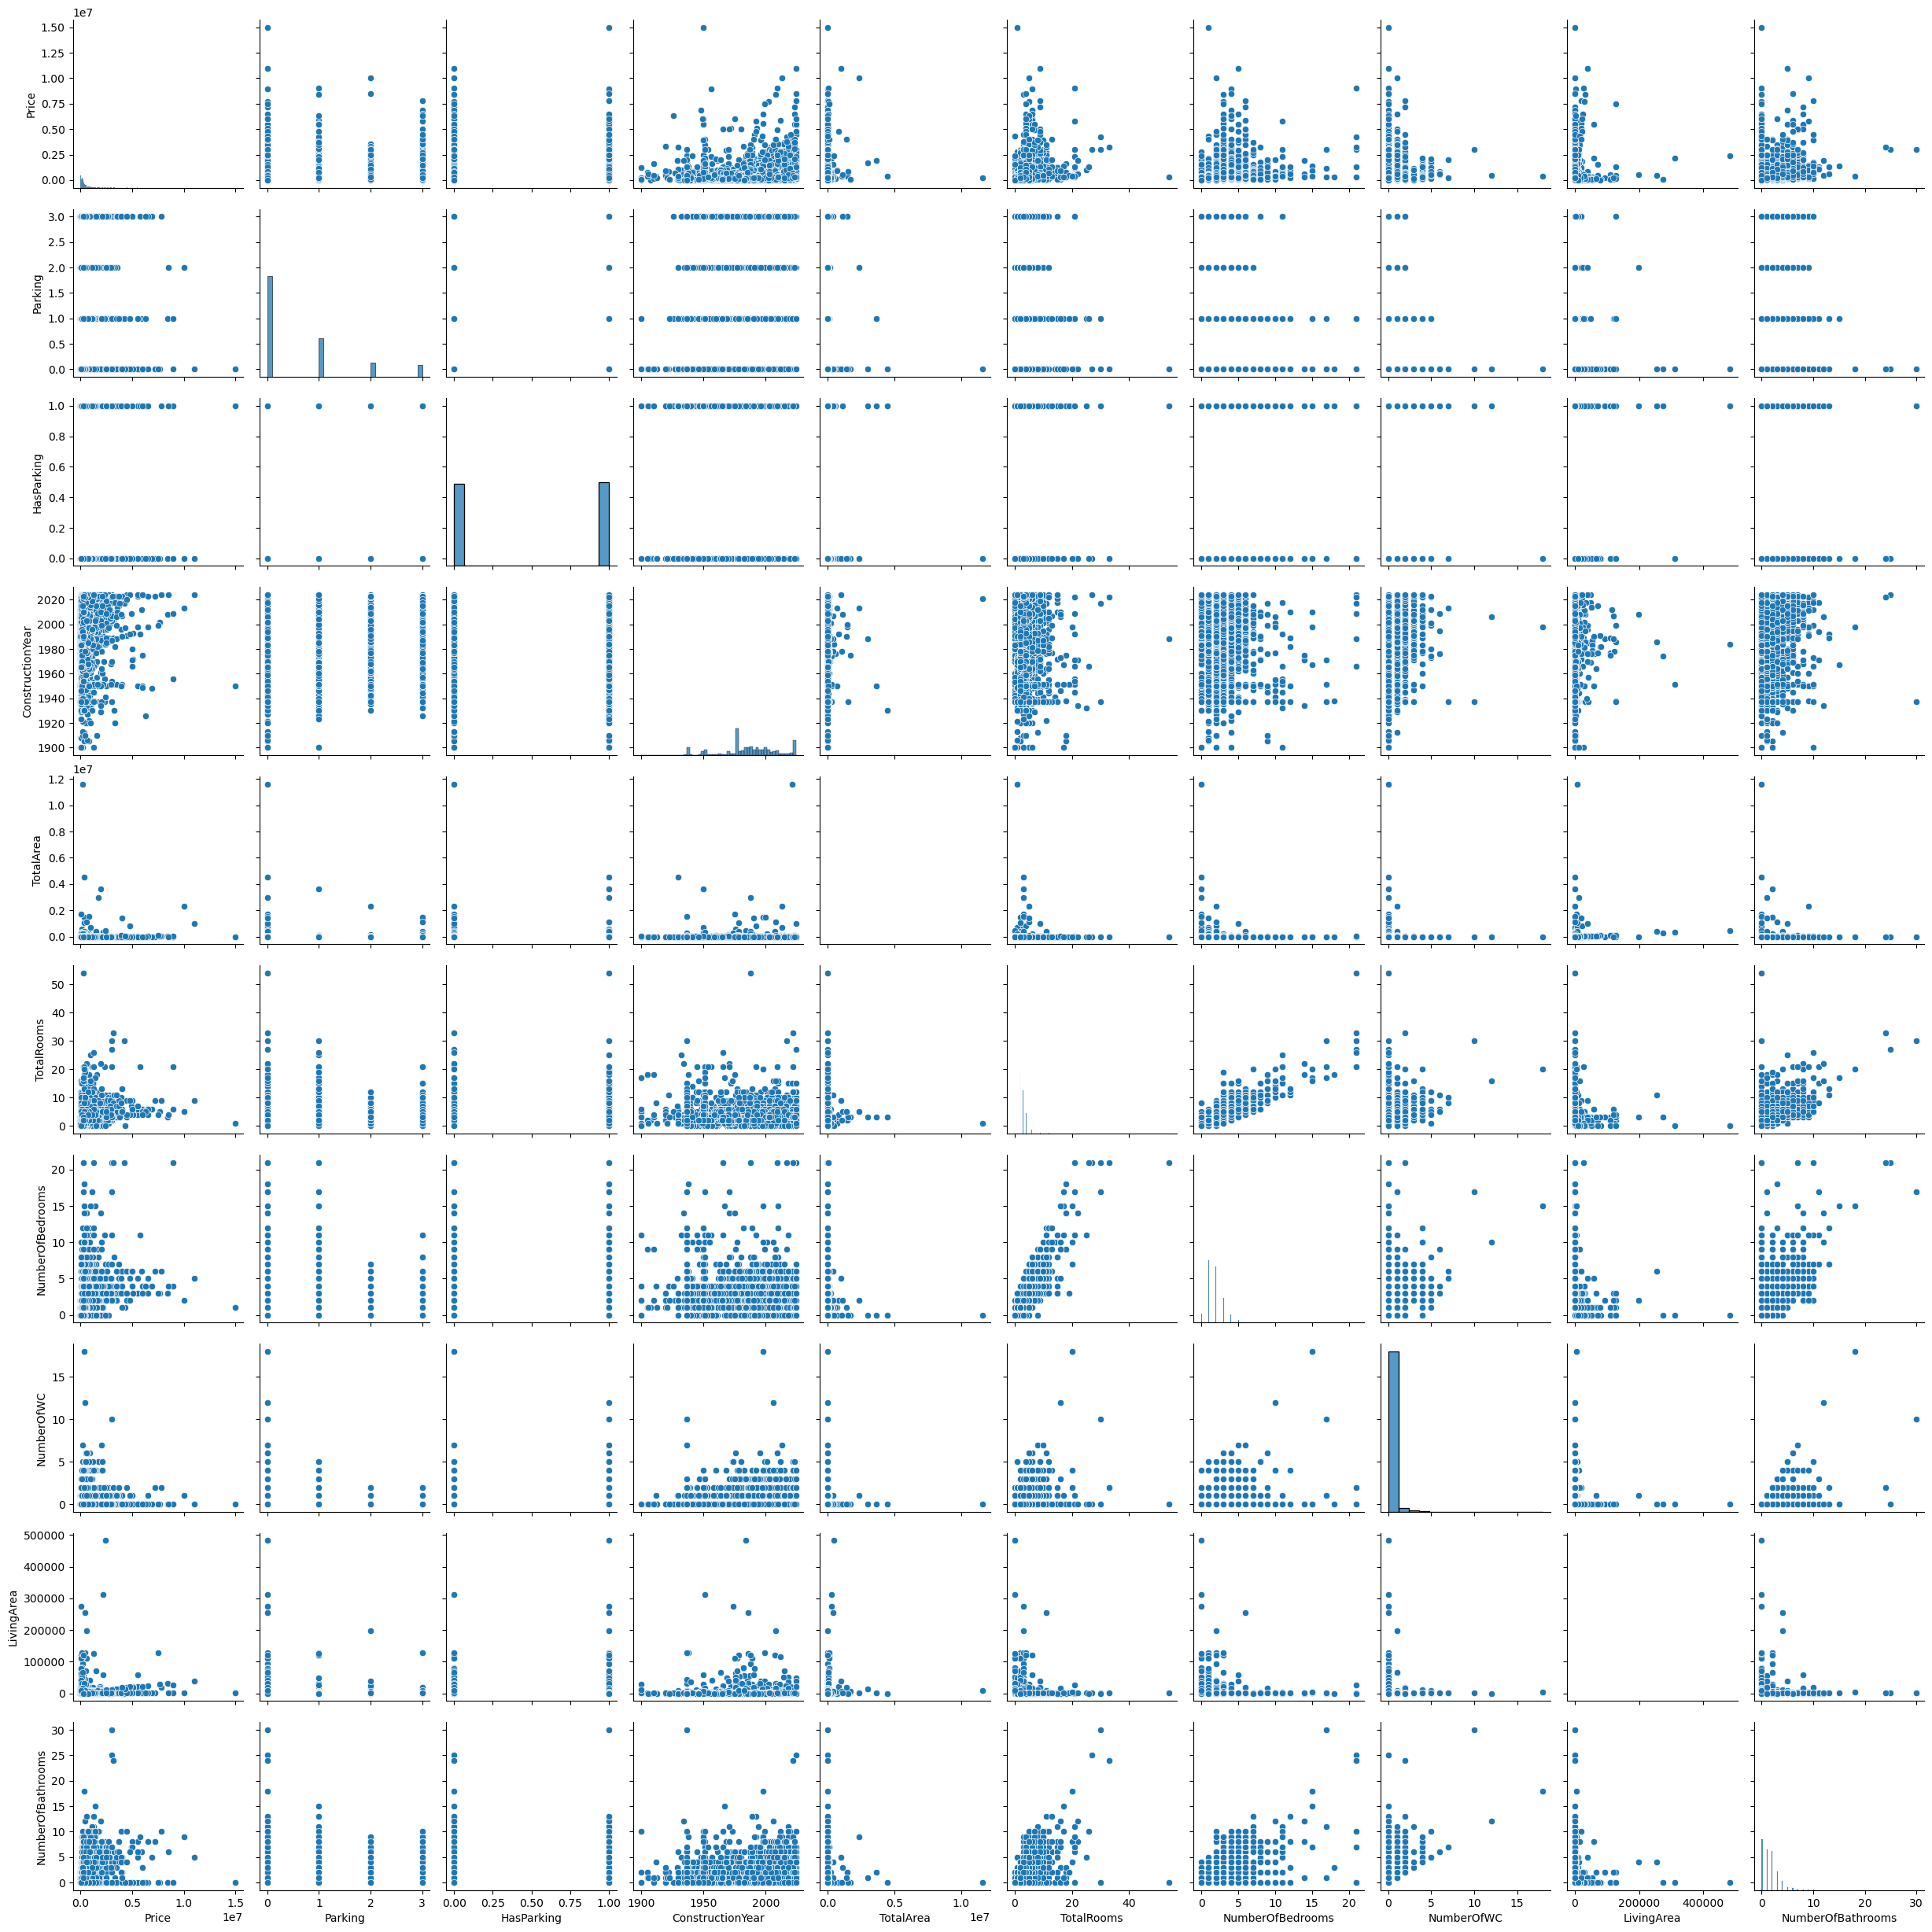

In [41]:
# Create a pair plot 
pairplot = sns.pairplot(sample_df)

In [51]:
#export pairplot
pairplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'), bbox_inches='tight')

### Pairplot discussion
> Reviewing the pairplot, I am interested in further exploring a few variables. Price has a few pairings that stand out to me, such as price and construction year. There appear to me more highly-priced properties with a more recent construction year with a few exceptions. However, there also appear to be a concentration of lower-priced properties with a recent construction year.

> I also notice that the number of bathrooms in a property appears to increase with more recent construction years. There are still a high concentration of properties with lower counts of bathrooms in recent construction years but the genral slope would appear to increase from left to right.

> Most instances of living area values accross all other variables are on the lower end, which makes sense because I don't imagine there are too many properties with large living areas. I find this interesting because I assumed as living area incresased, other variables such as price and the number of different rooms would also increase. 

> I'd like to further review the impact of price, construction year, living area, and total rooms on a number of variables and their impact on each other because these are some of the most recognizable variables in terms of real estate. 

## .06 Create a categorical plot and interpret the results

<Axes: xlabel='Price', ylabel='Count'>

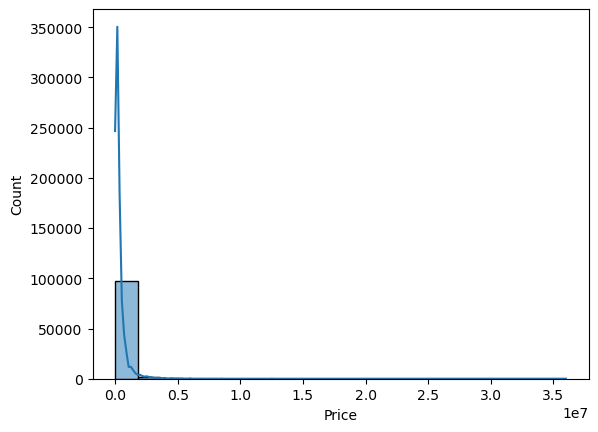

In [78]:
# First, I will create a histogram of the price variable
sns.histplot(df['Price'], bins = 20, kde = True)

In [80]:
# Additional info on the price variable
df['Price'].describe()

count    9.947600e+04
mean     3.654558e+05
std      6.453374e+05
min      5.000000e+02
25%      8.500000e+04
50%      2.100000e+05
75%      3.960000e+05
max      3.600000e+07
Name: Price, dtype: float64

In [84]:
# Create categories for the price variable
df.loc[df['Price'] < 85000, 'Price category'] = 'Low price'
df.loc[(df['Price'] >= 85000) & (df['Price'] < 396000), 'Price category'] = 'Middle price'
df.loc[df['Price'] >= 396000, 'Price category'] = 'High price'

In [86]:
# Check the value counts
df['Price category'].value_counts(dropna = False)

Price category
Middle price    50113
High price      24871
Low price       24492
Name: count, dtype: int64

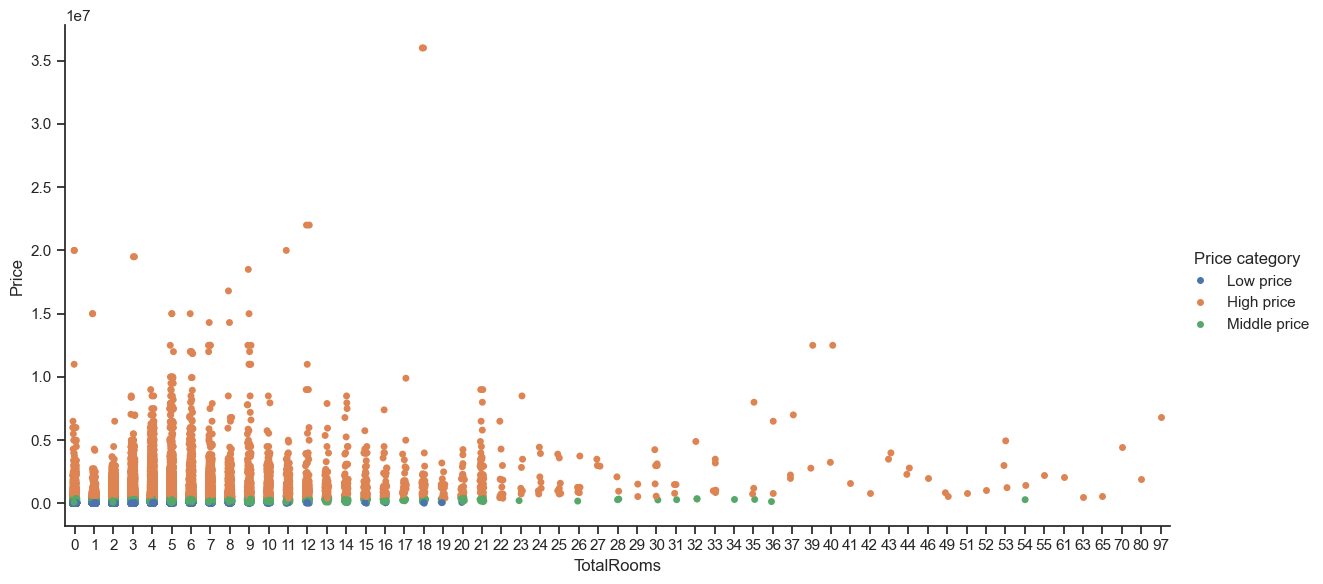

In [94]:
# Create a categorical plot of the price category and total rooms variables
sns.set(style="ticks")
price_cat_rooms_plot = sns.catplot(x="TotalRooms", y="Price", hue="Price category", data=df, height=6, aspect=2)

In [96]:
#export categorical plot
price_cat_rooms_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_cat_rooms_plot.png'), bbox_inches='tight')

### Categorical Plot Discussion
> My first impression is that high priced properties are spread across all numbers of total rooms. The high priced properties with zero rooms are likely land. The concentration of high priced properties in 4 to 7 total room area are likely either newly built houses or houses/apartments in expensive areas of Portugal. The high priced properties with many rooms are likely eithe mansions or commercial properties. It is no surprise that low priced properties tend to have fewer total rooms and that middle priced properties are sprinkled throughout the number of total rooms, though they have a slightly higher concentration on the lower end of total rooms. 

## .07 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### Question Revisited
> One question I asked is, "What type of effect does location, property type, property size, and construction year have on property price?". After conducting this visual exploration, I can say that there are very few single factors that have a strong impact on price. Construction year and the number of total rooms, bathrooms, and bedrooms may have some impact but no single variable appears to determine price. There does appear to be stronger ties to lower prices and total number of rooms, as seen in the categorical plot. I need to further investigate what combination of factors impact price and perhaps continue to view price in low, middle, and high categories.

> Another question I asked is, "Are newer properties more expensive than older properties?". Looking at the price and contruction year scatterplot shown in the pairplot shows highly-priced properties with a more recent construction year with a few exceptions. However, there also appear to be a concentration of lower-priced properties with a recent construction year. So, to answer my question, there do appear to be a higher number of expensive properties with a recent contruction year but there are also some high priced properties with an older construction year as well as a concentration of middle and lower priced properties with a recent construction year. It seems as though newer construction has a greater range of price compared to older construction.

### New Question
> Viewing the pairplot, one of my first thoughts was, "What impact are outliers having on this dataset?". When dealing with real estate, there are always going to be unique properties that can skew data. While it is important to take these properties into consideration in order to understand what real estate is available in the Portuguese market, outliers can make it difficult to interpret relationships. It is possible that removing outliers in variables such as price, total area, and number of rooms could give me a better understanding of the majority of the data.

## .08 Define any hypotheses that you can at this point.

#### If real estate prices decrease, then the number of total rooms will decrease. 
#### If construction year is newer, then the range of price in real estate will expand. 